# Trabalho 02 - Resistência dos Materiais MAC015 - Turma X 2024.3
___

- Ana Beatriz Lana Maciel Moreira Armond (202165501B)
- Gabriella Cruz e Silva (202165512B)

In [ ]:
# Importando Bibliotecas
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Atividade 01
___


Com base no Problema 02 da Atividade 01, desenvolva uma rotina computacional para cálculo dos
esforços internos isostáticas (equações M(x) e V(x)) e para representação dos respectivos diagramas
em vigas isostáticas.

## Relatório da Atividade

Utilizamos o código implementado na Parte 02 do Trabalho 01 para incrementar novas funcionalidades de modo a plotar os diagramas de força cortante (V) e momento fletor (M). O programa mantém suas funcionalidades implementadas anteriormente, porém sofreu melhorias e modificações.

## Mudanças realizadas
- **Implementação da classe Force:** Foi criada essa nova para representar forças pontuais, permitindo que sejam testados exemplos de vigas submetidas a forças concentradas além de carregamentos. Outras partes do código foram modificadas para considerar as forças às quais a viga é submetida em cálculo das reações de apoio. Além disso, a função `draw_beam` foi incrementada para que fizesse a plotagem das forças.

- **Função para determinar pontos de interesse:** A função `points(self)` da classe Beam retorna pontos de interesse na viga, que seriam os pontos onde se inicia ou termina um carregamento, posição dos apoios...

- **Cálculo da Força Cortante V(x):** Foi adicionada a função `shear_force(self, points)` na classe Beam, que computa a força cortante ao longo da viga nos pontos de interesse.

- **Cálculo do Momento Fletor M(x):** Também foi adicionada a função `bending_moment(self, points)` na classe Beam, que determina o momento fletor.

- **Função para plotagem dos diagramas:** A função `plot_analysis(beam, funcs_list, title, color, invert)` serve para imprimir os diagramas de momento fletor e força cortante.

## Bibliotecas Utilizadas
- numpy: Usada em operações com vetores e entre outros tipos de variáveis.

- sympy: Utilizada para manipulação simbólica, especialmente no cálculo das forças verticais e momentos totais gerados pelos carregamentos, bem como na solução do sistema de equações de equilíbrio estático.

- matplotlib: Usada para criar gráficos e desenhar a viga, os apoios e os carregamentos.

## Técnicas Utilizadas
- Integração Simbólica: A ferramenta de álgebra simbólica do sympy é usada para integrar as funções que representam os carregamentos, a fim de calcular a força total vertical e o momento gerado. Esse cálculo simbólico é eficiente para representar de forma exata as equações, sem precisar de discretizações numéricas.

- **Derivação Simbólica: A força cortante é obtida pela derivada do momento fletor em relação à posição na viga, garantindo a consistência entre os cálculos.**

- Solução de Sistemas de Equações Simbólicas: As reações nos apoios são determinadas a partir de um sistema de equações que envolvem o equilíbrio das forças verticais e dos momentos. O sympy.solve resolve essas equações para encontrar as reações de forma simbólica.

## Escolhas de Implementação

- **Cálculo da Força Cortante: A função da força cortante ao longo da viga é obtida somando as contribuições das reações nos apoios e subtraindo as integrais dos carregamentos distribuídos. Essa função é representada simbolicamente e pode ser plotada para análise gráfica.**

- **Cálculo do Momento Fletor: O momento fletor é obtido a partir da integral da força cortante ao longo da viga. O resultado fornece uma equação contínua que descreve a variação do momento fletor em cada ponto da estrutura.**

- Reações nos Apoios: As reações são calculadas simbolicamente com base nos carregamentos aplicados. As equações de equilíbrio de forças e momentos são resolvidas para determinar as reações verticais e momentos nos apoios.

- Representação Visual dos Carregamentos: A visualização foi projetada para ser clara e informativa, normalizando as intensidades para facilitar a leitura do gráfico.

- Cálculos Simbólicos: Usar o sympy para realizar os cálculos simbólicos em vez de usar métodos numéricos, como a integração numérica, proporciona uma representação exata das soluções, o que é crucial para uma análise estrutural precisa.

In [ ]:
# Classe que representa os apoios na viga, responsáveis por gerar reações
class Support:
    def __init__(self, rx, ry, rm, position, label):
        # Restrições nos eixos X, Y e momento
        self.rx = rx
        self.ry = ry
        self.rm = rm
        # Posição do apoio na viga
        self.position = position
        # Rótulo para identificação do apoio
        self.label = label

    # Representação do apoio, mostrando restrições e reações calculadas
    def __repr__(self):
        return (f"\nApoio {self.label}:\n"
                f"  Posição: {self.position}\n"
                f"  Restrições: Rx={self.rx}, Ry={self.ry}\n")

class Force:
  def __init__(self, magnitude, position, label):
    self.magnitude = magnitude
    self.position = position
    self.label = label

  @property
  def force_moment(self):
    return self.magnitude * self.position

  def __repr__(self):
      return (f"\nForça {self.label}:\n"
              f"   Magnitude: {self.magnitude}\n"
              f"   Posição: {self.position}\n")

# Classe base para carregamentos distribuídos (usada por cargas constantes e lineares)
class Load:
    def __init__(self, start, end, label):
        self.start = start          # Posição inicial do carregamento
        self.end = end              # Posição final do carregamento
        self.label = label          # Rótulo para identificação
        self.x = sp.symbols('x')    # Variável simbólica para integração

    @property
    # Retorna a função simplificada do carregamento
    def load_function(self):
        simplified_function = self.function.subs(self.variables)
        return simplified_function.subs({self.x: self.x - self.start}) if simplified_function.has(self.x) else simplified_function

    @property
    # Calcula a força total vertical como a integral do carregamento
    def total_force_y(self):
        return sp.integrate(self.load_function, (self.x, self.start, self.end))

    @property
    # Calcula o momento total gerado pelo carregamento
    def total_moment(self):
        return sp.integrate(self.load_function * self.x, (self.x, self.start, self.end))

    # Avalia a carga em um ponto específico
    def __call__(self, x):
        return self.load_function.subs({self.x: x})

    # Função cortante para carregamentos distribuídos
    def shear_function(self, x):
      w_at_point_x = self(x)
      wx = sp.integrate(sp.diff(self.function, self.x), self.x)
      aux = wx + w_at_point_x
      return sp.integrate(aux.subs(self.variables), self.x)

    # Representação do carregamento, mostrando ponto inicial e final
    def __repr__(self):
        return (f"\nCarregamento {self.label}:\n"
                f"  Início: {self.start}\n"
                f"  Fim: {self.end}\n")

# Classe para carregamentos constantes
class ConstantLoad(Load):
    def __init__(self, start, end, label, intensity):
        self.intensity = intensity                      # Intensidade constante do carregamento
        self.variables = {sp.symbols('a'): intensity}   # Variável simbólica associada
        super().__init__(start, end, label)

    @property
    # Função constante do carregamento
    def function(self):
        return sp.symbols('a')

    # Adiciona a intensidade à representação do carregamento
    def __repr__(self):
        base_repr = super().__repr__()
        return base_repr + f"  Intensidade Constante: {self.intensity}\n"

# Classe para carregamentos lineares
class LinearLoad(Load):
    def __init__(self, start, end, label, start_intensity, end_intensity):
        # Intensidade no início do carregamento
        self.start_intensity = start_intensity
        # Intensidade no final do carregamento
        self.end_intensity = end_intensity
        # Cálculo da inclinação e do termo constante da função linear
        self.slope = (end_intensity - start_intensity) / (end - start)
        self.intercept = start_intensity
        self.variables = {
            sp.symbols('a'): self.slope,
            sp.symbols('b'): self.intercept
        }
        super().__init__(start, end, label)

    @property
    # Função linear que descreve o carregamento
    def function(self):
        return sp.symbols('a') * self.x + sp.symbols('b')

    # Adiciona as intensidades inicial e final à representação do carregamento
    def __repr__(self):
        base_repr = super().__repr__()
        return (base_repr +
                f"  Intensidade Inicial: {self.start_intensity}\n"
                f"  Intensidade Final: {self.end_intensity}\n")

# Classe para representar a viga como um sistema completo
class Beam:
    def __init__(self, length, forces=None, loads=None, supports=None):
        self.length = length                             # Comprimento total da viga
        self.forces = forces if forces else []           # Forças aplicadas
        self.loads = loads if loads else []              # Lista de carregamentos
        self.supports = supports if supports else []     # Lista de apoios
        self.x = sp.symbols('x')                         # Variável simbólica para análise

    # Adiciona uma força à viga
    def add_force(self, force):
        self.forces.append(force)

    # Adiciona um carregamento à viga
    def add_load(self, load):
        self.loads.append(load)

    # Adiciona um apoio à viga
    def add_support(self, support):
        self.supports.append(support)

    # Soma das forças verticais dos carregamentos
    def total_vertical_forces(self):
        return sum(load.total_force_y for load in self.loads)

    # Soma dos momentos gerados por carregamentos
    def total_load_moments(self):
        return sum(load.total_moment for load in self.loads)

    # Soma das forças
    def total_forces(self):
        return sum(force.magnitude for force in self.forces)

    # Soma dos momentos das forças
    def total_force_moments(self):
        return sum(force.force_moment for force in self.forces)

    # Calcula as reações nos apoios com base no equilíbrio estático
    def calculate_support_reactions(self):
        total_fy = self.total_vertical_forces() + self.total_forces()
        total_m = self.total_load_moments() + self.total_force_moments()

        # Criação de variáveis simbólicas para reações
        reaction_y_symbols = [sp.symbols(f"R_{support.label}y") for support in self.supports if support.ry]
        reaction_m_symbols = [sp.symbols(f"R_{support.label}m") for support in self.supports if support.rm]

        # Termos de momento gerados pelas reações verticais
        moment_terms = [sp.symbols(f"R_{support.label}y") * support.position for support in self.supports if support.ry]

        # Equações de equilíbrio (força e momento)
        eq_fy = sp.Eq(total_fy + sum(reaction_y_symbols), 0)
        eq_m = sp.Eq(total_m + sum(moment_terms) + sum(reaction_m_symbols), 0)

        # Resolução do sistema de equações
        solutions = sp.solve((eq_fy, eq_m), reaction_y_symbols + reaction_m_symbols)

        # Atualiza as reações calculadas nos apoios
        for support in self.supports:
            support.reaction_y = solutions.get(sp.symbols(f"R_{support.label}y"), 0)
            support.reaction_m = solutions.get(sp.symbols(f"R_{support.label}m"), 0)

        return solutions

    # Lista de Pontos de interesse
    def points(self):

      points = [force.position for force in self.forces] + \
               [load.start for load in self.loads] + \
               [load.end for load in self.loads] + \
               [support.position for support in self.supports]

      return sorted(list(set(points)))

    # Calcula a força cortante V(x)
    def shear_force(self, points):
        V_forces = []             # Lista para armazenar os valores da força cortante em cada trecho
        last_force_point = None   # Variável para armazenar a força cortante do último ponto avaliado
        x = sp.symbols('x')       # Define a variável simbólica 'x' para expressões simbólicas do SymPy
        last_end = None

        # Iteração pelos trechos da viga
        # Exemplo: se L = 10 -> [start, end] = [(0,2), (2,5), (5,10), (10,10)]
        if points[0] != 0:
          points = [0] + points

        if points[-1] != self.length:
          points = points + [self.length]

        for start, end in zip(points[:-1], points[1:]):

          distance = end - start
          # Filtra os carregamentos distribuídos que atuam no trecho analisado
          loads = [load for load in self.loads if load.start < end and load.end > start]
          # Filtra as forças pontuais aplicadas exatamente no início do trecho
          forces = [force.magnitude for force in self.forces if force.position == start]
          # Obtém as reações dos apoios que atuam no início do trecho
          reactions = [support.reaction_y for support in self.supports if support.position == start]

          shear_function = [load.shear_function(start) for load in loads]
          v = sum(forces) + sum(reactions) + sum(shear_function)

          if last_force_point is not None and last_end != 0  and start != self.length:
            v += last_force_point

          last_force_point = v.subs({x:distance}) if not type(v) == int and v.has(x) else v
          last_end = end
          V_forces.append({'F': v, 'Início': start, 'Fim': end})

        V_forces.append({'F': 0, 'Início':  self.length, 'Fim': self.length})

        return V_forces

    # Calcula o momento fletor M(x)
    def bending_moment(self, points, V):
      M_funcs = []                # Lista para armazenar as funções do momento fletor
      last_moment = None          # Último valor de momento no trecho anterior (inicialmente indefinido)
      x = sp.symbols('x')         # Variável simbólica para operações simbólicas
      last_end = None

      # Iteração pelos trechos da viga
      # Exemplo: se L = 10 -> [start, end] = [(0,2), (2,5), (5,10), (10,10)]
      if points[0] != 0:
          points = [0] + points

      if points[-1] != self.length:
        points = points + [self.length]

      for i, (start, end) in enumerate(zip(points[:-1], points[1:])):

        distance = end - start
        # Obtém as reações dos apoios
        reactions = [support.reaction_m for support in self.supports if support.position == start]

        shear_function = V[i]['F']
        M_f = sp.integrate(shear_function, x)
        m = M_f + sum(reactions)

        if last_moment is not None and last_end != 0 and start != self.length:
          m += last_moment

        last_moment = m.subs({x:distance}) if not type(m) == int and m.has(x) else m
        M_funcs.append({'F': m, 'Início': start, 'Fim': end})

      return M_funcs

    # Método principal para análise da viga
    def analyze(self):
      self.support_reactions = self.calculate_support_reactions()
      points = self.points()
      self.V = self.shear_force(points)
      self.M = self.bending_moment(points, self.V)

    # Representação da viga com seus elementos
    def __repr__(self):
        return (f"\nViga:\n"
                f"  Comprimento: {self.length}\n"
                f"  Forças: {''.join(map(str, self.forces))}\n"
                f"  Carregamentos: {''.join(map(str, self.loads))}\n"
                f"  Apoios: {''.join(map(str, self.supports))}\n")

# Função para desenhar a viga e os elementos associados
def draw_beam(beam):
  fig, ax = plt.subplots(figsize=(12, 3))

  # Desenha a linha representando a viga
  ax.plot([0, beam.length], [0, 0], color="black", linewidth=2, label="Viga")

  # Desenha os apoios
  for support in beam.supports:
      ax.scatter(support.position, 0, color="blue", s=50, label="Apoio" if 'Apoio' not in ax.get_legend_handles_labels()[1] else "")
      ax.text(support.position, -0.2, f"{support.label}", ha="center", va="top", fontsize=10)

  # Desenha as forças pontuais
  for force in beam.forces:
    if force.magnitude <= 0:
      plt.arrow(
          force.position, 1,  # Starting position (x, y)
          0, -0.8,  # Arrow direction (dx, dy)
          head_width=0.1, head_length=0.1,  # Adjust arrowhead size
          fc='pink', ec='pink',  # Fill and edge color
          linewidth=2,
      )
    else:
      plt.arrow(
          force.position, 0.2,  # Starting position (x, y)
          0, 0.8,  # Arrow direction (dx, dy)
          head_width=0.1, head_length=0.1,  # Adjust arrowhead size
          fc='pink', ec='pink',  # Fill and edge color
          linewidth=2,
      )


  # Normaliza a intensidade dos carregamentos para visualização
  max_val = max(
      [abs(load.start_intensity) for load in beam.loads if isinstance(load, LinearLoad)] +
      [abs(load.intensity) for load in beam.loads if isinstance(load, ConstantLoad)]
  )

  # Desenha os carregamentos
  first = True
  for load in beam.loads:
      x = np.linspace(load.start, load.end, 100)
      y = np.linspace(-load.start_intensity / max_val, -load.end_intensity / max_val, 100) if isinstance(load, LinearLoad) else -load.intensity / max_val
      ax.fill_between(x, y, color="green", label='Carregamento' if first else None, alpha=0.5)
      first = False

  # Configurações visuais adicionais
  ax.axhline(0, color="gray", linewidth=0.5, linestyle="--")
  ax.set_xlim(-0.1 * beam.length, 1.1 * beam.length)
  ax.set_ylim(-1, 1.4)
  ax.set_aspect("equal")
  ax.axis("off")
  ax.legend()
  plt.show()

def plot_analysis(beam, funcs_list, title, color, invert=False):
  plt.figure(figsize=(8, 6))
  old_y = None
  x = sp.symbols('x')

  for i, func_dict in enumerate(funcs_list):
      # Obtém as informações das funções
      func = func_dict['F']
      start = func_dict['Início']
      end = func_dict['Fim']

      if not type(func) == int and func.has(x):
        func_lambda = sp.lambdify(x, func, 'numpy')
      else:
        func_lambda = lambda x_vals: np.full_like(x_vals, func)

      # Percorrendo funções ao longo da distância
      x_vals = np.linspace(0, end-start, 400)
      y_vals = func_lambda(x_vals)
      x_axis = np.linspace(start, end, 400)

      # Ponto final
      if type(y_vals) == float or type(y_vals) == int:
        x_axis = [beam.lenght]
        y_vals = [y_vals]

      # Linhas verticais entre seções
      if old_y is not None:
        plt.vlines(start, old_y, y_vals[0], color=color)

      if i == 0:
        plt.vlines(start, 0, y_vals[0], color=color)

      # Plotar seção
      plt.plot(x_axis, y_vals, color=color)

      old_y = y_vals[-1]

  if invert:
    plt.gca().invert_yaxis()

  # Eixos e legenda
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f"Diagrama de {title}")
  plt.grid(True)

  # Plot Final
  plt.show()

___
# Exemplos

> OBSERVAÇÃO: utilizamos uma escala diferente, optando por N enquanto o FTOOL trabalha com kN.

___
## Viga A

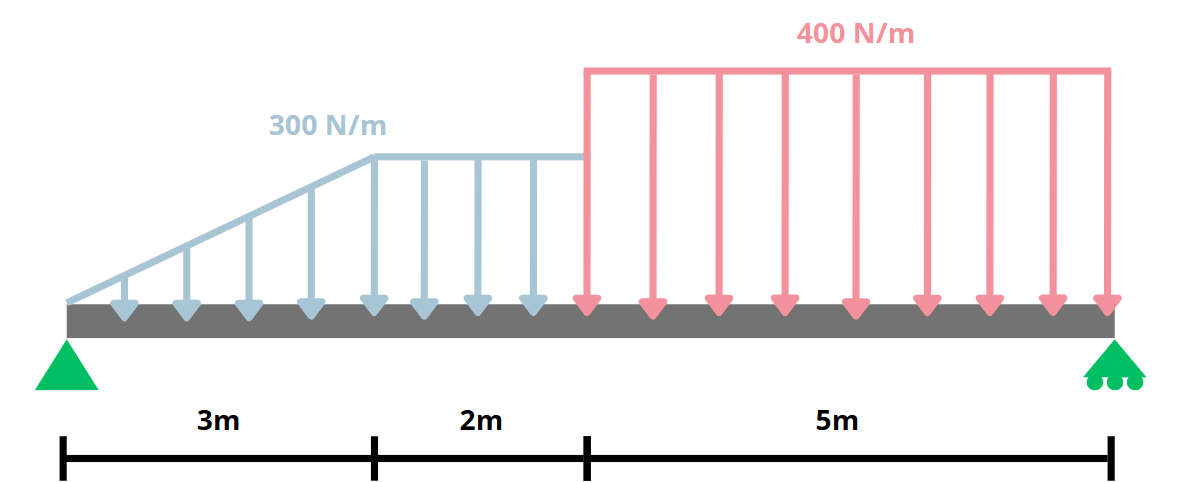


### Solução Pelo FTOOL

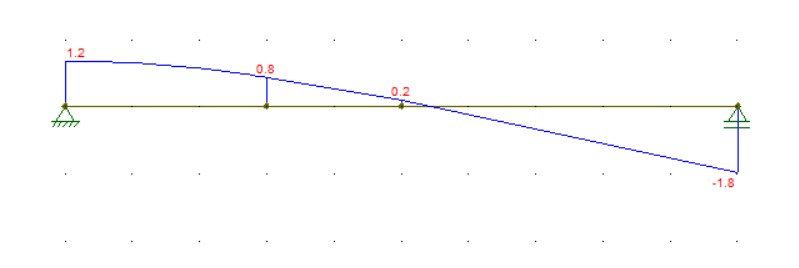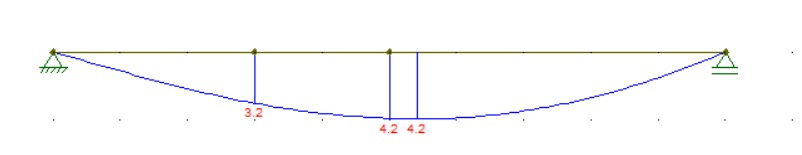


Informações da viga:

Viga:
  Comprimento: 10
  Forças: 
  Carregamentos: 
Carregamento w1:
  Início: 0
  Fim: 3
  Intensidade Inicial: 0
  Intensidade Final: -300

Carregamento w2:
  Início: 3
  Fim: 5
  Intensidade Constante: -300

Carregamento w3:
  Início: 5
  Fim: 10
  Intensidade Constante: -400

  Apoios: 
Apoio A:
  Posição: 0
  Restrições: Rx=1, Ry=1

Apoio B:
  Posição: 10
  Restrições: Rx=0, Ry=1


Reações nos apoios:
{R_Ay: 1220.00000000000, R_By: 1830.00000000000}




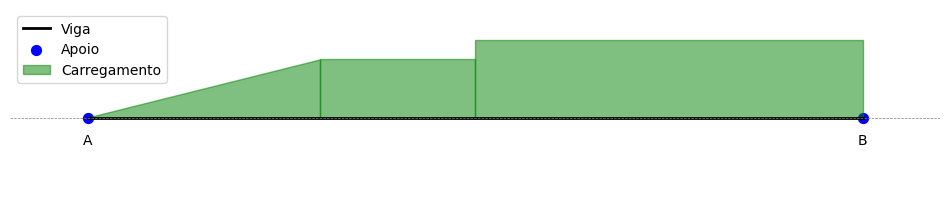

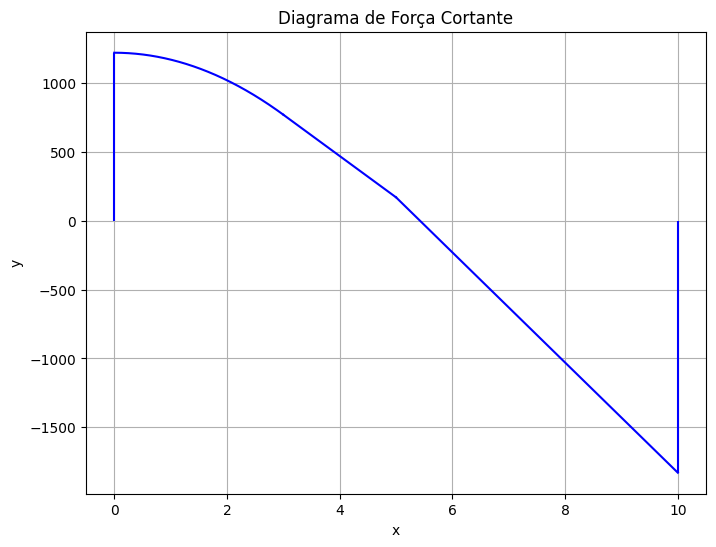

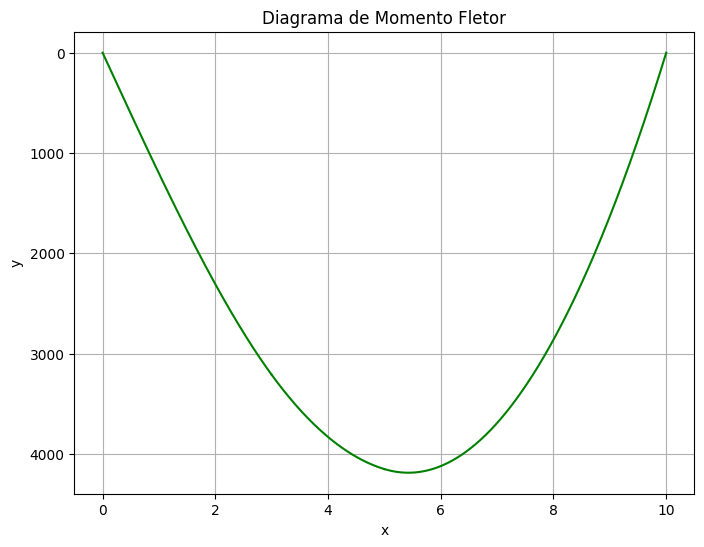

In [ ]:
# Situação da Viga A
length = 10  # Comprimento

# Apoios
supports = [
    Support(rx=1, ry=1, rm=0, position=0, label='A'),
    Support(rx=0, ry=1, rm=0, position=10, label='B'),
]

# Carregamentos
loads = [
    LinearLoad(start=0, end=3, label='w1', start_intensity=0, end_intensity=-300),
    ConstantLoad(start=3, end=5, label='w2', intensity=-300),
    ConstantLoad(start=5, end=10, label='w3', intensity=-400),
]

# Viga
beam = Beam(length=length, loads=loads, supports=supports)

# Exibe informações
print("Informações da viga:")
print(beam)
beam.analyze()
print("====================")
print("Reações nos apoios:")
print(beam.support_reactions)
print("====================")
print("\n")

# Desenha a viga, o diagrama de força cortante e o diagrama de momento fletor
draw_beam(beam)
plot_analysis(beam, beam.V, 'Força Cortante', 'blue', invert=False)
plot_analysis(beam, beam.M, 'Momento Fletor', 'green', invert=True)

___
## Viga B

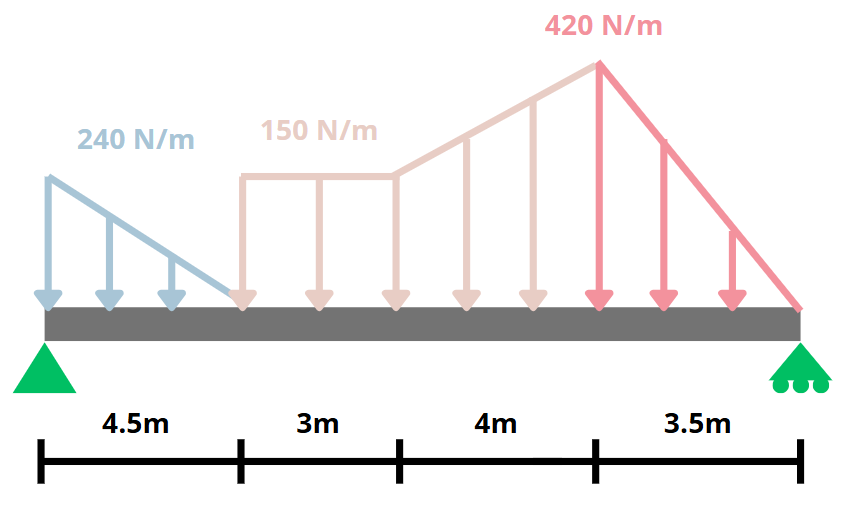

### Solução pelo FTOOL

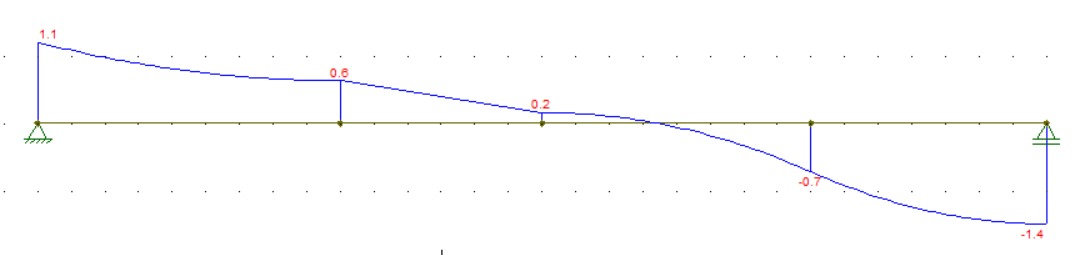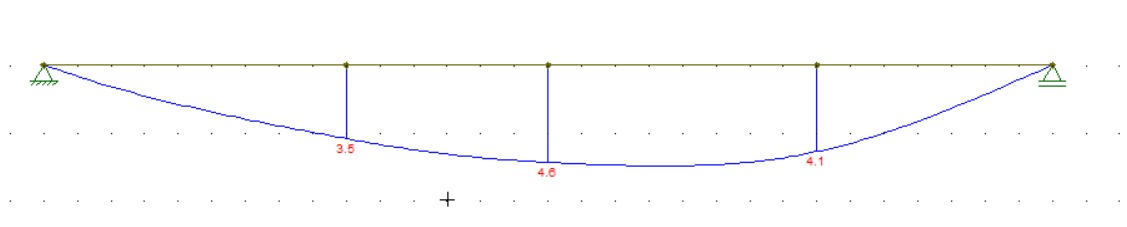

Informações da viga:

Viga:
  Comprimento: 15
  Forças: 
  Carregamentos: 
Carregamento w1:
  Início: 0
  Fim: 4.5
  Intensidade Inicial: -240
  Intensidade Final: 0

Carregamento w2:
  Início: 4.5
  Fim: 7.5
  Intensidade Constante: -150

Carregamento w3:
  Início: 7.5
  Fim: 11.5
  Intensidade Inicial: -150
  Intensidade Final: -420

Carregamento w4:
  Início: 11.5
  Fim: 15
  Intensidade Inicial: -420
  Intensidade Final: 0

  Apoios: 
Apoio A:
  Posição: 0
  Restrições: Rx=0, Ry=1

Apoio B:
  Posição: 15
  Restrições: Rx=1, Ry=1


Reações nos apoios:
{R_Ay: 1264.33333333333, R_By: 1600.66666666667}




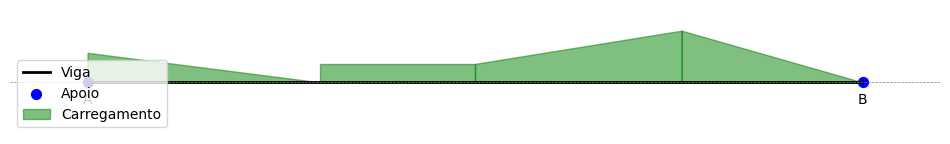

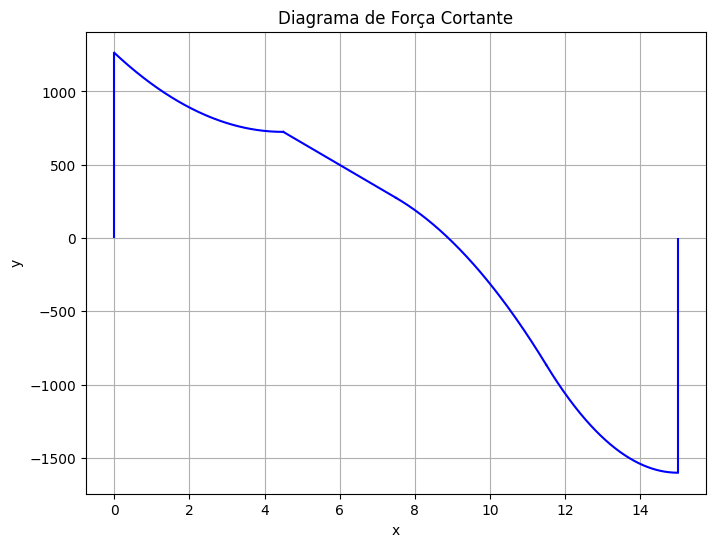

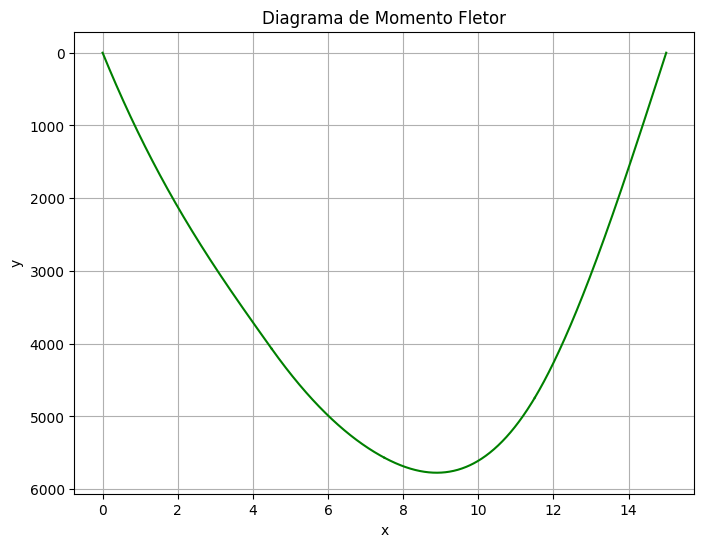

In [ ]:
# Situação da Viga B
length = 15  # Comprimento

# Apoios
supports = [
    Support(rx=0, ry=1, rm=0, position=0, label='A'),
    Support(rx=1, ry=1, rm=0, position=15, label='B'),
]

# Carregamentos
loads = [
    LinearLoad(start=0, end=4.5, label='w1', start_intensity=-240, end_intensity=0),
    ConstantLoad(start=4.5, end=7.5, label='w2', intensity=-150),
    LinearLoad(start=7.5, end=11.5, label='w3', start_intensity=-150, end_intensity=-420),
    LinearLoad(start=11.5, end=15, label='w4', start_intensity=-420, end_intensity=0),
]

# Viga
beam = Beam(length=length, loads=loads, supports=supports)

# Exibe informações
print("Informações da viga:")
print(beam)
beam.analyze()
print("====================")
print("Reações nos apoios:")
print(beam.support_reactions)
print("====================")
print("\n")

# Desenha a viga, o diagrama de força cortante e o diagrama de momento fletor
draw_beam(beam)
plot_analysis(beam, beam.V, 'Força Cortante', 'blue', invert=False)
plot_analysis(beam, beam.M, 'Momento Fletor', 'green', invert=True)

___
## Viga C

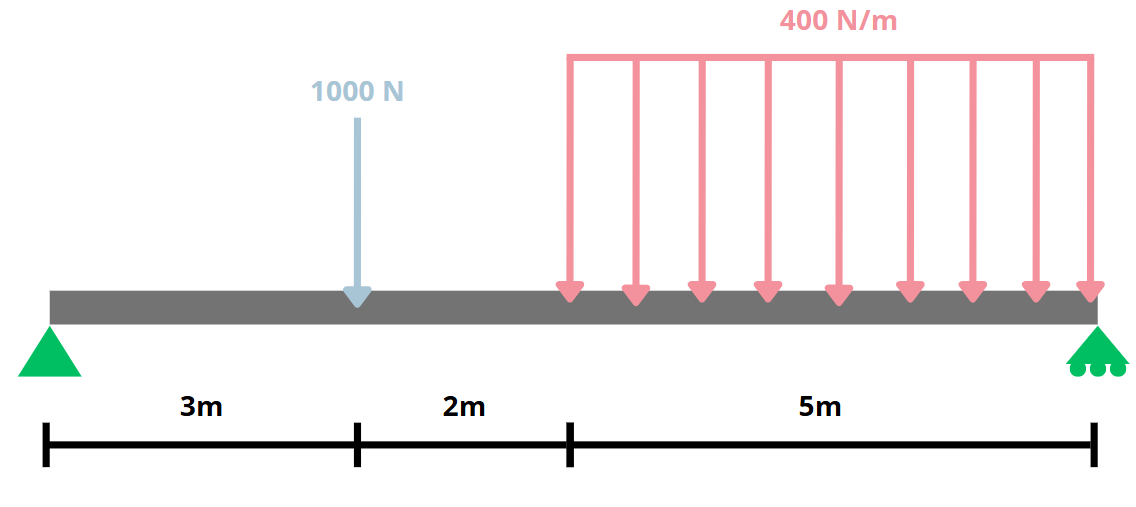

### Solução pelo FTOOL

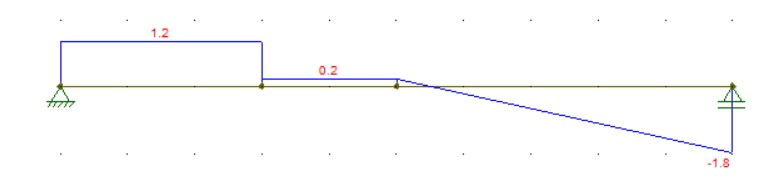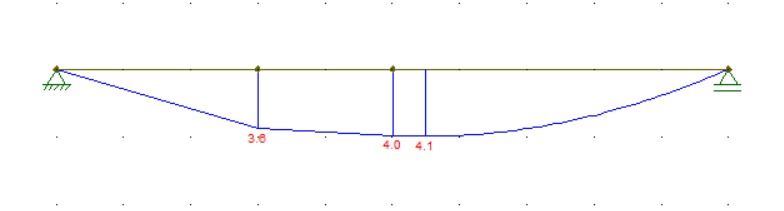

Informações da viga:

Viga:
  Comprimento: 10
  Forças: 
Força F1:
   Magnitude: -1000
   Posição: 3

  Carregamentos: 
Carregamento W1:
  Início: 5
  Fim: 10
  Intensidade Constante: -400

  Apoios: 
Apoio A:
  Posição: 0
  Restrições: Rx=1, Ry=1

Apoio B:
  Posição: 10
  Restrições: Rx=0, Ry=1


Reações nos apoios:
{R_Ay: 1200, R_By: 1800}




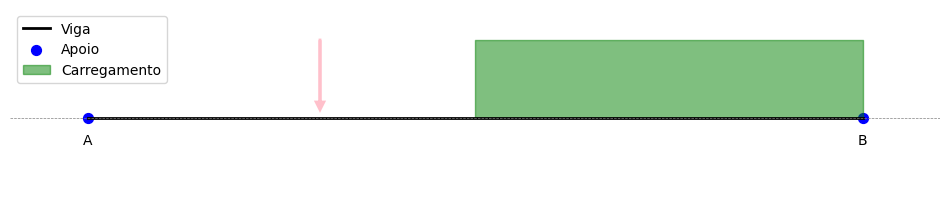

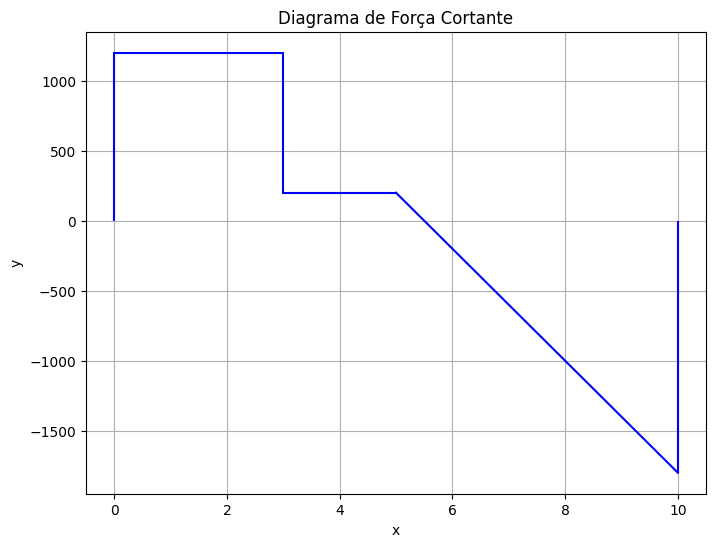

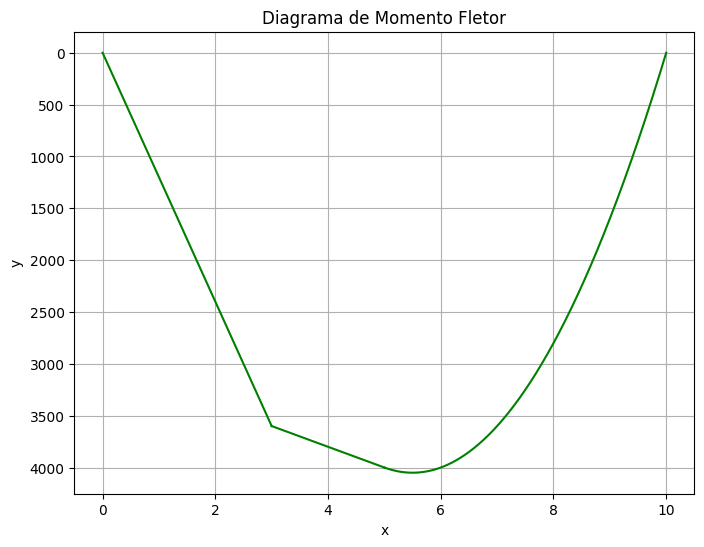

In [ ]:
# Viga C
length = 10  # Comprimento

# Apoios
supports = [
    Support(rx=1, ry=1, rm=0, position=0, label='A'),
    Support(rx=0, ry=1, rm=0, position=10, label='B'),
]

# Forças
forces = [
    Force(magnitude=-1000, position=3, label='F1'),
]

# Carregamentos
loads = [
    ConstantLoad(start=5, end=10, label='W1', intensity=-400),
]

# Viga
beam = Beam(length=length, forces=forces, loads=loads, supports=supports)

# Exibe informações
print("Informações da viga:")
print(beam)
beam.analyze()
print("====================")
print("Reações nos apoios:")
print(beam.support_reactions)
print("====================")
print("\n")

# Desenha a viga, o diagrama de força cortante e o diagrama de momento fletor
draw_beam(beam)
plot_analysis(beam, beam.V, 'Força Cortante', 'blue', invert=False)
plot_analysis(beam, beam.M, 'Momento Fletor', 'green', invert=True)